[how-to-implement-the-discrete-fourier-transform](https://www.nayuki.io/page/how-to-implement-the-discrete-fourier-transform)

[plotting-a-fast-fourier-transform-in-python](https://stackoverflow.com/a/25735274/18013914)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

import math
import cmath

In [63]:
py = np.linspace(0, 12 * np.pi, 100)
px = np.linspace(0, 1, 100)


len(py)

100

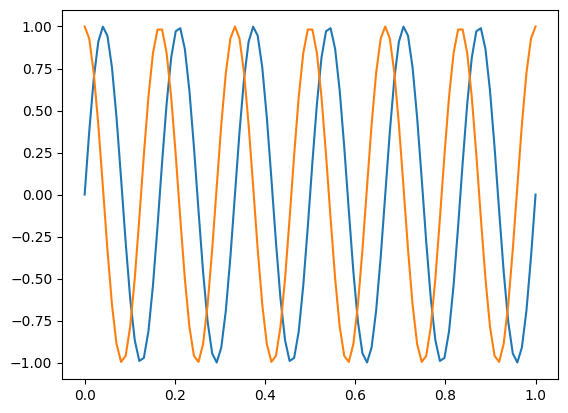

In [64]:
plt.plot(px, np.sin(py))
plt.plot(px, np.cos(py))

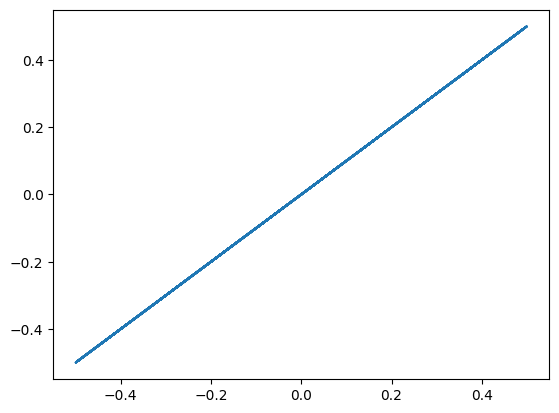

In [65]:
sincos = np.cos(py) * np.sin(py)
plt.plot(sincos, sincos)
# sincos

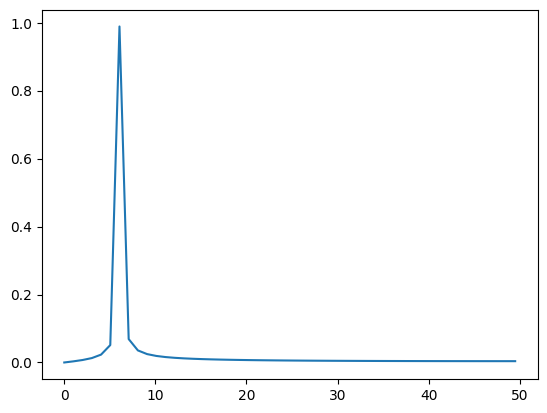

: 

In [98]:
def compute_dft_complex(arr):
    n = len(arr)
    output = []
    for k in range(n):  # For each output element
        s = complex(0)
        for t in range(n):  # For each input element
            angle = 2j * cmath.pi * t * k / n
            s += arr[t] * cmath.exp(-angle)
        output.append(s)
    return output


plt.plot((px * 100)[:50], (np.abs(compute_dft_complex(np.sin(py))) / 100 * 2)[:50])

In [9]:
def compute_dft_real_pair(inreal, inimag):
    assert len(inreal) == len(inimag)
    n = len(inreal)
    outreal = []
    outimag = []
    for k in range(n):  # For each output element
        sumreal = 0.0
        sumimag = 0.0
        for t in range(n):  # For each input element
            angle = 2 * math.pi * t * k / n
            sumreal += inreal[t] * math.cos(angle) + inimag[t] * math.sin(angle)
            sumimag += -inreal[t] * math.sin(angle) + inimag[t] * math.cos(angle)
        outreal.append(sumreal)
        outimag.append(sumimag)
    return (outreal, outimag)

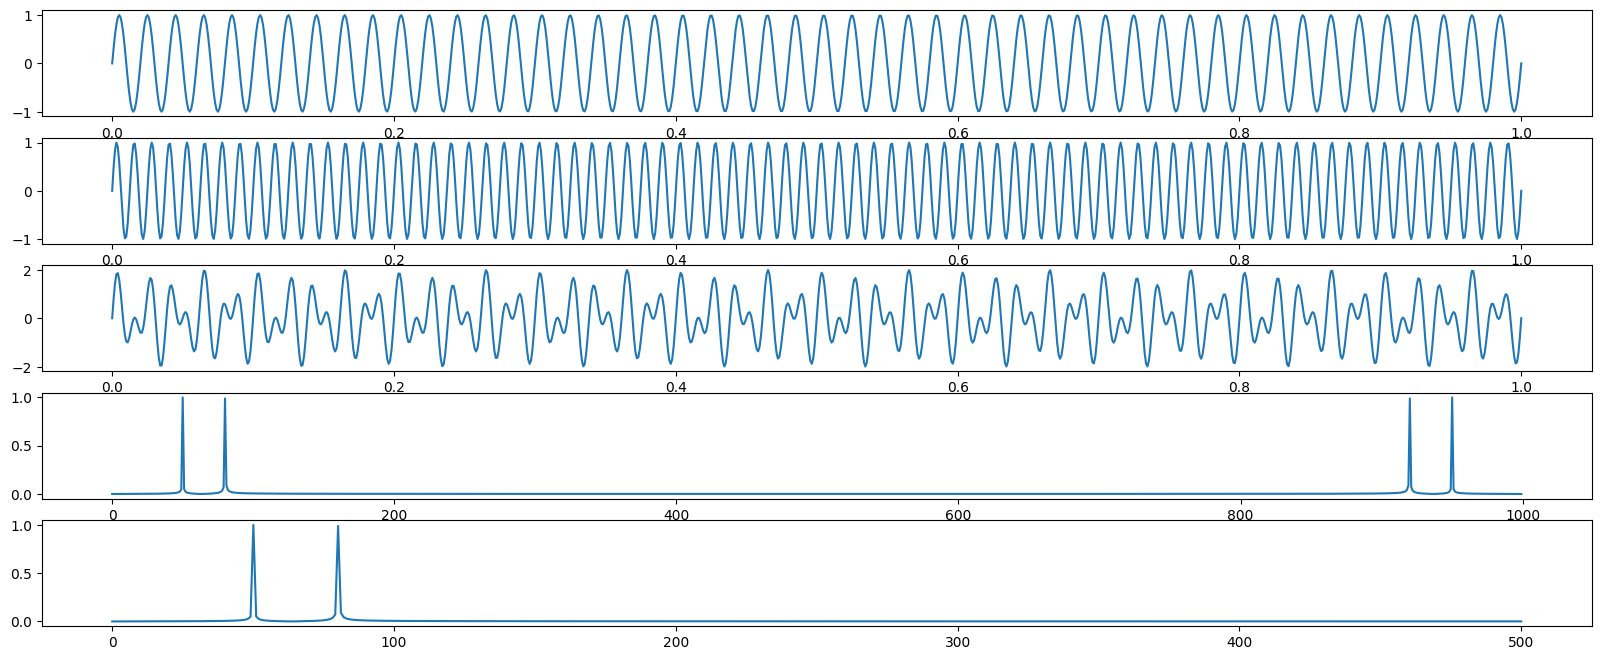

In [10]:
N = 1000
# sample spacing
# T = 1 / 1000
x = np.linspace(0, 1, N)

y1 = np.sin(50 * 2 * np.pi * x)
y2 = np.sin(80 * 2 * np.pi * x)
y = y1 + y2

yf = compute_dft_complex(y)
xf = np.linspace(0, 500, N // 2)

fig, ax = plt.subplots(5, figsize=(20, 8))
ax[0].plot(x, y1)
ax[1].plot(x, y2)
ax[2].plot(x, y)
ax[3].plot(range(1000), 2 / N * np.abs(yf))
ax[4].plot(xf, 2 / N * np.abs(yf[: N // 2]))

In [11]:
yf = np.array(yf)
np.where(yf[:N] > 0.99)

(array([ 47,  48,  49,  50,  74,  75,  76,  77,  78,  79,  80, 920, 921,
        922, 923, 924, 925, 926, 950, 951, 952, 953], dtype=int64),)

In [12]:
yf[range(60)] = 0
yf[range(940, 1000)] = 0

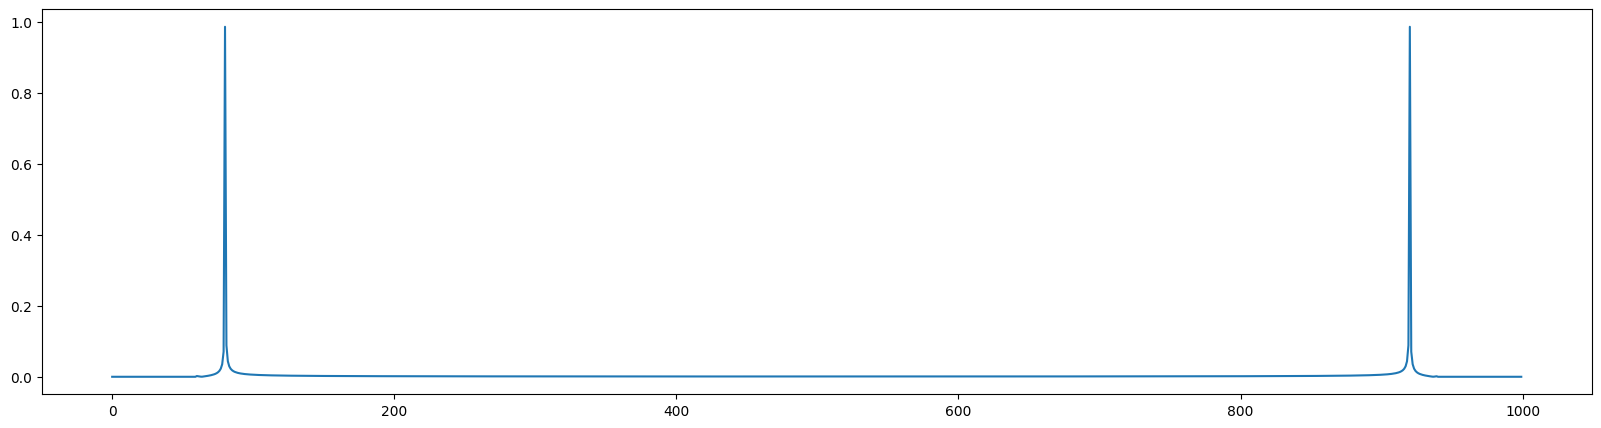

In [13]:
plt.figure(figsize=(20, 5))
plt.plot(range(1000), 2 / N * np.abs(yf[:N]))

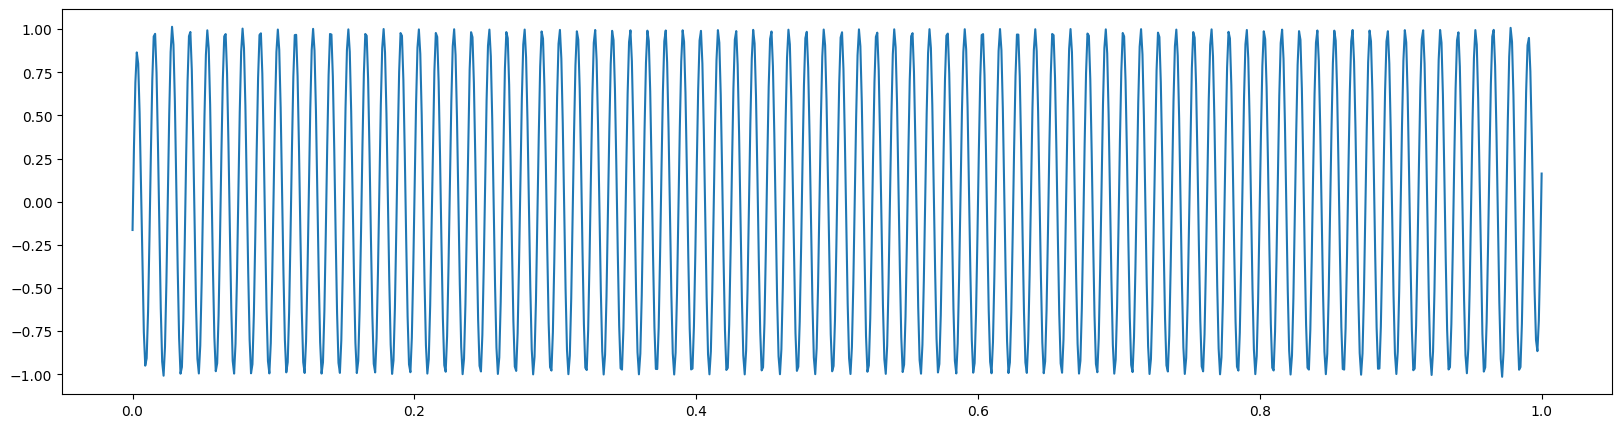

In [14]:
plt.figure(figsize=(20, 5))
plt.plot(x, np.fft.ifft(yf))